In [38]:
import altair as alt 
import pandas as pd

alt.renderers.enable('notebook')

url = "https://www.bmi.bund.de/SharedDocs/downloads/DE/veroeffentlichungen/themen/moderne-verwaltung/ifg/ifg-statistik-2018-maschinenlesbar.csv;jsessionid=54E3EDDA47AAACAB9B04EDFFBB7230EB.2_cid364?__blob=publicationFile&v=2"

ifgdata = pd.read_csv(url, sep=";", encoding = "ISO-8859-1")
ifgdata = ifgdata.set_index('Unnamed: 0')

ifgdata_tr = ifgdata.T

ifgdata_tr

Unnamed: 0,BK Amt,BK Amt GB,BK Amt Gesamt,BMAS,BMAS GB,BMAS Gesamt,AA,AA GB,AA Gesamt,BMI,...,BPrA,BT,BR,BBk,BVerfG,BfDI,BRH,Ressorts Gesamt,Ressort GB'e Gesamt,Ressorts und GB'e Gesamt
Eingang Anträge in 2018,154,9,163,56,1231,1287,434,0,434,332,...,27,2666,6,55,16,233,5,5351,8140,13491
Erledigungen und Bescheide in 2018,161,9,170,56,1226,1282,501,0,501,332,...,27,2827,6,53,17,207,5,5593,7998,13591
Informationszugang gewährt,12,0,12,25,1049,1074,100,0,100,128,...,8,58,0,30,5,90,1,910,5756,6666
Informationszugang teilweise gewährt,17,0,17,7,28,35,87,0,87,35,...,2,20,3,6,2,22,0,335,333,668
Informationszugang abgelehnt,54,9,63,6,47,53,32,0,32,67,...,12,43,2,4,6,34,0,463,478,941
sonstige Erledigung,78,0,78,18,102,120,282,0,282,102,...,5,2706,1,13,4,61,4,3885,1431,5316
Gebühr erhoben,15,0,15,2,18,20,75,0,75,12,...,0,0,0,1,0,2,0,173,932,1105
Höhe der Gebühr bis 50 ,9,0,9,0,6,6,57,0,57,2,...,0,0,0,1,0,0,0,93,386,479
Höhe der Gebühr bis 50 - 100 ,2,0,2,1,5,6,12,0,12,1,...,0,0,0,0,0,2,0,24,271,295
Höhe der Gebühr bis > 100 ,4,0,4,1,7,8,6,0,6,9,...,0,0,0,0,0,0,0,56,275,331


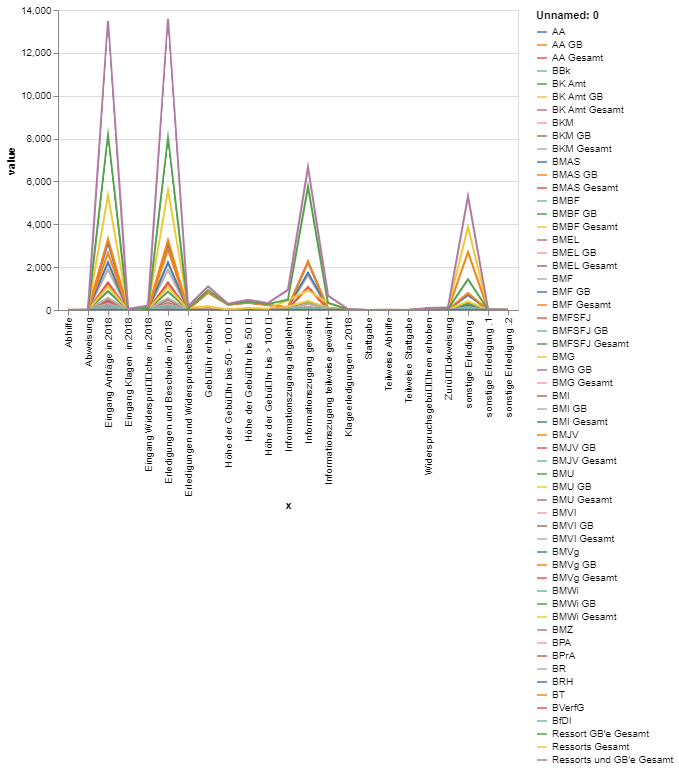

In [41]:
df = ifgdata_tr
df.index.name = "x"

data = df.reset_index().melt('x')
data

alt.Chart(data).mark_line().encode(
    x='x',
    y='value',
    color='Unnamed: 0'
)

disclaimer: not real data yet. still needs to be averaged ( /total requests )! 